<a href="https://colab.research.google.com/github/CastanharoA/_projetos/blob/master/r_ic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ntenha

[*********************100%%**********************]  2 of 2 completed


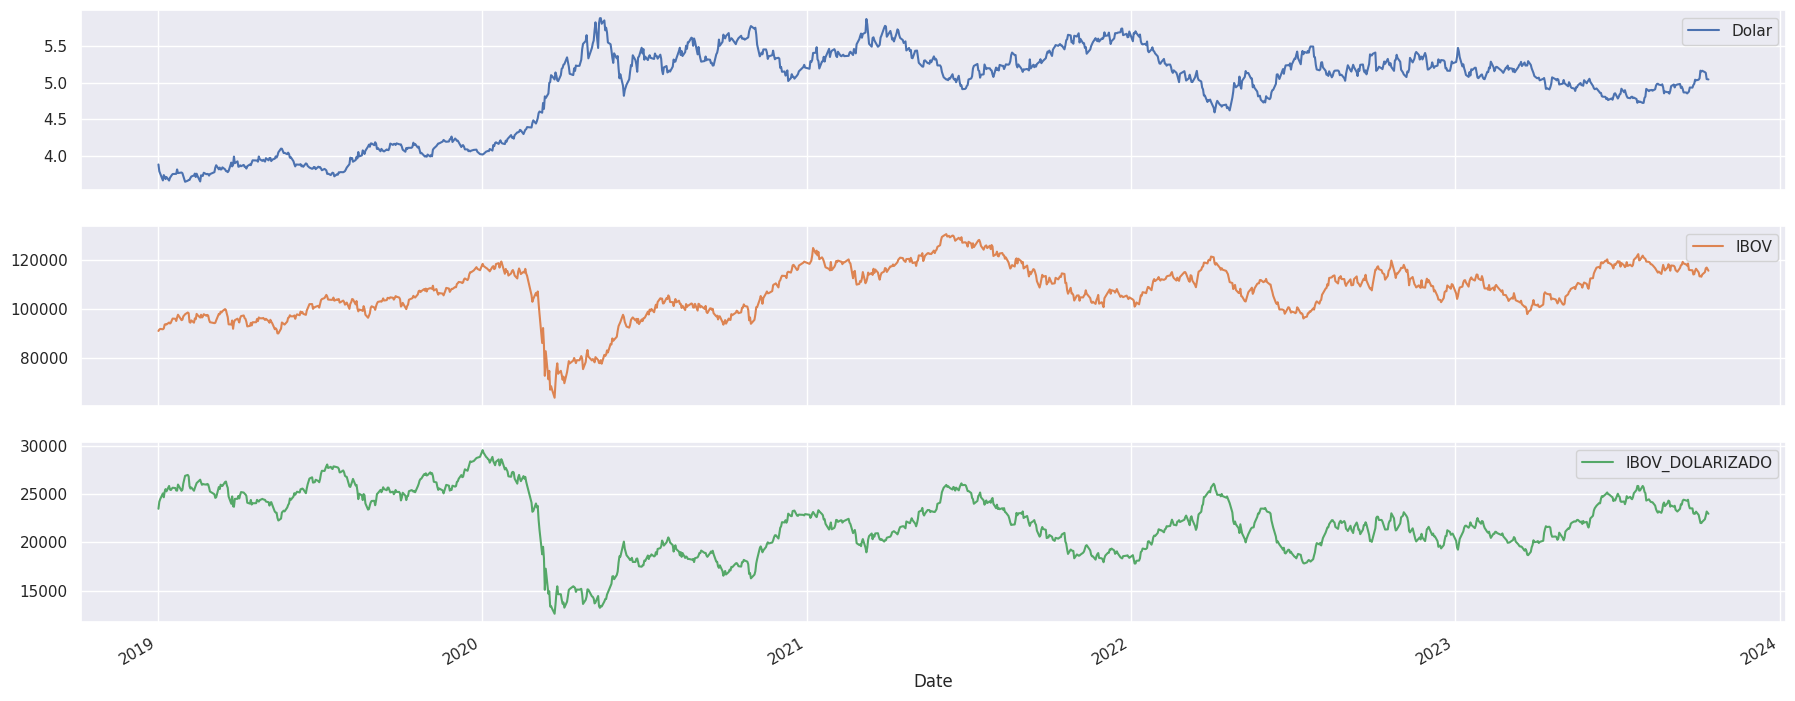

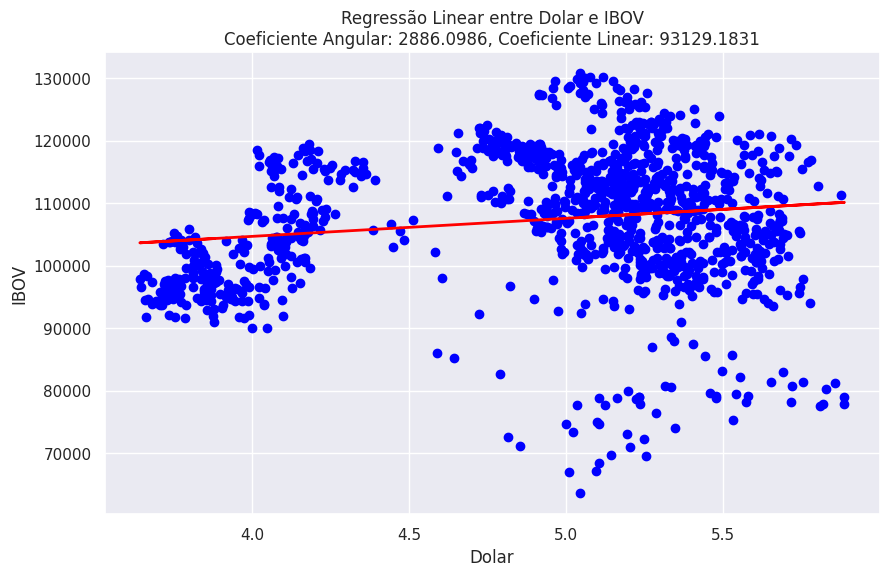

In [16]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Baixar os dados do Yahoo Finance
ativos = "^BVSP USDBRL=X"
carteira = yf.download(ativos, start="2019-01-01")["Close"]
carteira.columns = ["Dolar", "IBOV"]

# Remover dados faltantes (NaN)
carteira = carteira.dropna()

# Divisão do IBOV pelo Dólar
carteira["IBOV_DOLARIZADO"] = carteira["IBOV"] / carteira["Dolar"]

# Plot dos dados
sns.set()
carteira.plot(subplots=True, figsize=(22, 9))


retornos = carteira.pct_change()[1:]
retornos

retornos.describe()



# Regressão Linear
X = carteira["Dolar"].values.reshape(-1, 1)  # Dólar como variável independente (X)
y = carteira["IBOV"].values  # IBOV como variável dependente (y)

regressor = LinearRegression()
regressor.fit(X, y)

# Coeficientes da regressão
coef_angular = regressor.coef_[0]
coef_linear = regressor.intercept_

# Plot da reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='red', linewidth=2)
plt.title(f'Regressão Linear entre Dolar e IBOV\nCoeficiente Angular: {coef_angular:.4f}, Coeficiente Linear: {coef_linear:.4f}')
plt.xlabel('Dolar')
plt.ylabel('IBOV')
plt.show()


[*********************100%%**********************]  2 of 2 completed


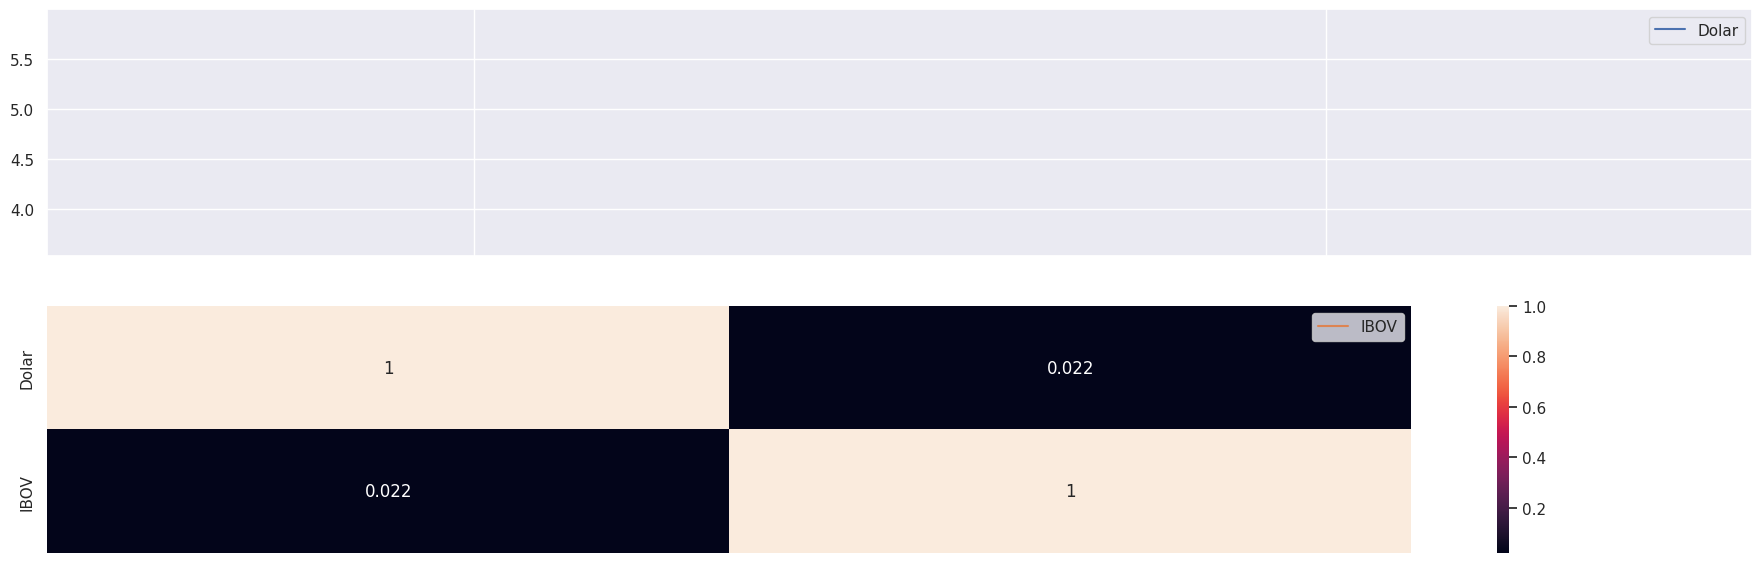

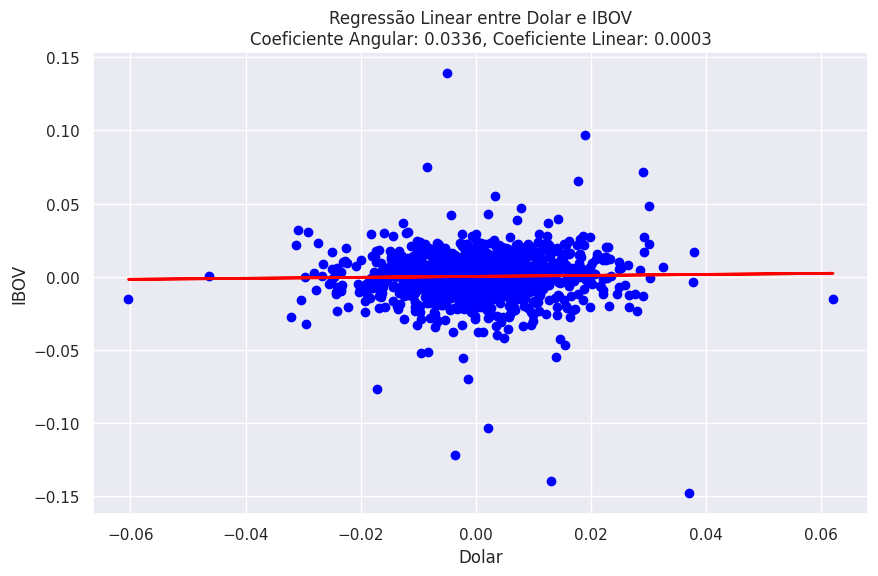

In [23]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Baixar os dados do Yahoo Finance
ativos = "^BVSP USDBRL=X"
carteira = yf.download(ativos, start="2019-01-01")["Close"]
carteira.columns = ["Dolar", "IBOV"]

# Remover dados faltantes (NaN)
carteira = carteira.dropna()



# Plot dos dados
sns.set()
carteira.plot(subplots=True, figsize=(22, 9))


retornos = carteira.pct_change()[1:]
retornos

retornos.describe()
sns.heatmap(retornos.corr(), annot=True)


retornos1 =retornos["Dolar"].rolling(252).corr(retornos["IBOV"]).plot(figsize=(22,8))



# Regressão Linear
X = retornos["Dolar"].values.reshape(-1, 1)  # Dólar como variável independente (X)
y = retornos["IBOV"].values  # IBOV como variável dependente (y)

regressor = LinearRegression()
regressor.fit(X, y)

# Coeficientes da regressão
coef_angular = regressor.coef_[0]
coef_linear = regressor.intercept_

# Plot da reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='red', linewidth=2)
plt.title(f'Regressão Linear entre Dolar e IBOV\nCoeficiente Angular: {coef_angular:.4f}, Coeficiente Linear: {coef_linear:.4f}')
plt.xlabel('Dolar')
plt.ylabel('IBOV')
plt.show()


[*********************100%%**********************]  2 of 2 completed
Média Dólar: 4.9297, Desvio Padrão Dólar: 0.5891
Média IBOV: 107356.7855, Desvio Padrão IBOV: 10909.1741
Média IBOV_DOLARIZADO: 22071.7931, Desvio Padrão IBOV_DOLARIZADO: 3208.3560

Coeficientes de Regressão:
[93129.18309761  2886.09863546]

Matriz de Correlação:
                    Dolar      IBOV  IBOV_DOLARIZADO
Dolar            1.000000  0.155844        -0.768147
IBOV             0.155844  1.000000         0.507039
IBOV_DOLARIZADO -0.768147  0.507039         1.000000

Correlações de Partes:
                    Dolar      IBOV  IBOV_DOLARIZADO
Dolar            1.000000  0.155844        -0.768147
IBOV             0.155844  1.000000         0.507039
IBOV_DOLARIZADO -0.768147  0.507039         1.000000

Correlações Parciais:
[1.96635131e-187 6.62071458e-008]

Múltiplo R (R²): 0.0243
R² Ajustado: 0.0235
Mudança em R²: 0.0008
Erro Padrão da Tabela de Estimativa: 116217468.8997
                            OLS Regression 

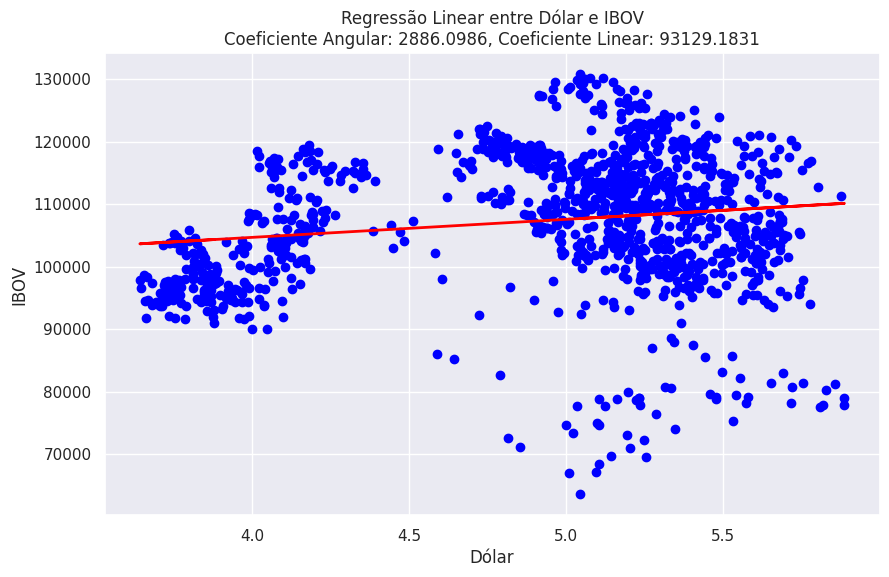

Avaliação do Modelo:
R² é moderado, verifique se é suficiente para seus objetivos.
R² Ajustado é moderado, considere a parcimônia do modelo.


NameError: ignored

In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Baixar os dados do Yahoo Finance
ativos = "^BVSP USDBRL=X"
carteira = yf.download(ativos, start="2019-01-01")["Close"]
carteira.columns = ["Dolar", "IBOV"]

# Remover dados faltantes (NaN)
carteira = carteira.dropna()

# Divisão do IBOV pelo Dólar
carteira["IBOV_DOLARIZADO"] = carteira["IBOV"] / carteira["Dolar"]

# Estatísticas descritivas
media_dolar = carteira["Dolar"].mean()
desvio_padrao_dolar = carteira["Dolar"].std()
media_ibov = carteira["IBOV"].mean()
desvio_padrao_ibov = carteira["IBOV"].std()
media_ibov_dolarizado = carteira["IBOV_DOLARIZADO"].mean()
desvio_padrao_ibov_dolarizado = carteira["IBOV_DOLARIZADO"].std()

# Regressão Linear
X = carteira["Dolar"].values.reshape(-1, 1)  # Dólar como variável independente (X)
y = carteira["IBOV"].values  # IBOV como variável dependente (y)

X = sm.add_constant(X)  # Adicionar uma constante para o termo linear

model = sm.OLS(y, X).fit()

# Estatísticas de regressão
coeficientes = model.params
matriz_correlacao = carteira.corr()
correlacao_partes = carteira.corr(method='pearson')
correlacoes_parciais = model.pvalues

# Outras estatísticas
r_squared = model.rsquared
r_squared_adj = model.rsquared_adj
change_r_squared = r_squared - r_squared_adj
std_error = model.mse_resid


valores_previstos = model.fittedvalues
residuos = model.resid

# Exibindo estatísticas
print(f"Média Dólar: {media_dolar:.4f}, Desvio Padrão Dólar: {desvio_padrao_dolar:.4f}")
print(f"Média IBOV: {media_ibov:.4f}, Desvio Padrão IBOV: {desvio_padrao_ibov:.4f}")
print(f"Média IBOV_DOLARIZADO: {media_ibov_dolarizado:.4f}, Desvio Padrão IBOV_DOLARIZADO: {desvio_padrao_ibov_dolarizado:.4f}")

print("\nCoeficientes de Regressão:")
print(coeficientes)

print("\nMatriz de Correlação:")
print(matriz_correlacao)

print("\nCorrelações de Partes:")
print(correlacao_partes)

print("\nCorrelações Parciais:")
print(correlacoes_parciais)

print(f"\nMúltiplo R (R²): {r_squared:.4f}")
print(f"R² Ajustado: {r_squared_adj:.4f}")
print(f"Mudança em R²: {change_r_squared:.4f}")
print(f"Erro Padrão da Tabela de Estimativa: {std_error:.4f}")
print(model.summary())
print("\nAnálise de Variância:")


print("\nValores Previstos:")
print(valores_previstos)

print("\nResíduos:")
print(residuos)

# Plot da reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color='blue')
plt.plot(X[:, 1], model.predict(X), color='red', linewidth=2)
plt.title(f'Regressão Linear entre Dólar e IBOV\nCoeficiente Angular: {coeficientes[1]:.4f}, Coeficiente Linear: {coeficientes[0]:.4f}')
plt.xlabel('Dólar')
plt.ylabel('IBOV')
plt.show()






In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Baixar os dados do Yahoo Finance
ativos = "^BVSP USDBRL=X"
carteira = yf.download(ativos, start="2019-01-01")["Close"]
carteira.columns = ["Dolar", "IBOV"]

# Remover dados faltantes (NaN)
carteira = carteira.dropna()

# Divisão do IBOV pelo Dólar
carteira["IBOV_DOLARIZADO"] = carteira["IBOV"] / carteira["Dolar"]

# Estatísticas descritivas
media_dolar = carteira["Dolar"].mean()
desvio_padrao_dolar = carteira["Dolar"].std()
media_ibov = carteira["IBOV"].mean()
desvio_padrao_ibov = carteira["IBOV"].std()
media_ibov_dolarizado = carteira["IBOV_DOLARIZADO"].mean()
desvio_padrao_ibov_dolarizado = carteira["IBOV_DOLARIZADO"].std()

# Regressão Linear
X = carteira["Dolar"].values.reshape(-1, 1)  # Dólar como variável independente (X)
y = carteira["IBOV"].values  # IBOV como variável dependente (y)

X = sm.add_constant(X)  # Adicionar uma constante para o termo linear

model = sm.OLS(y, X).fit()

# Estatísticas de regressão
coeficientes = model.params
matriz_correlacao = carteira.corr()
correlacao_partes = carteira.corr(method='pearson')
correlacoes_parciais = model.pvalues

# Outras estatísticas
r_squared = model.rsquared
r_squared_adj = model.rsquared_adj
change_r_squared = r_squared - r_squared_adj
std_error = model.mse_resid


valores_previstos = model.fittedvalues
residuos = model.resid

# Exibindo estatísticas
print("Estatísticas Descritivas:")
print(f"Média Dólar: {media_dolar:.4f}, Desvio Padrão Dólar: {desvio_padrao_dolar:.4f}")
print(f"Média IBOV: {media_ibov:.4f}, Desvio Padrão IBOV: {desvio_padrao_ibov:.4f}")
print(f"Média IBOV_DOLARIZADO: {media_ibov_dolarizado:.4f}, Desvio Padrão IBOV_DOLARIZADO: {desvio_padrao_ibov_dolarizado:.4f}")

print("\nCoeficientes de Regressão:")
print(coeficientes)

print("\nMatriz de Correlação:")
print(matriz_correlacao)

print("\nCorrelações de Partes:")
print(correlacao_partes)

print("\nCorrelações Parciais:")
print(correlacoes_parciais)

print("\nAvaliação do Modelo:")
if r_squared > 0.8:
    print("R² é alto, o modelo pode ser bom.")
else:
    print("R² é moderado, verifique se é suficiente para seus objetivos.")

if r_squared_adj > 0.8:
    print("R² Ajustado é alto, sugerindo um bom ajuste.")
else:
    print("R² Ajustado é moderado, considere a parcimônia do modelo.")

# Avaliação dos coeficientes e significância
if all(valores_p < 0.05):
    print("Todos os coeficientes são estatisticamente significativos.")
else:
    print("Alguns coeficientes podem não ser estatisticamente significativos.")

if std_error < 0.1:
    print("Erro Padrão baixo sugere um bom ajuste.")
else:
    print("Erro Padrão é moderado, verifique a variação não explicada pelo modelo.")

# Avaliação dos resíduos
# Inclua aqui as verificações relacionadas aos resíduos

# Outras considerações de acordo com o contexto

# Análise de Variância
print("\nAnálise de Variância:")
print(model.summary())

# Valores Previstos
print("\nValores Previstos:")
print(valores_previstos)

# Resíduos
print("\nResíduos:")
print(residuos)

# Plot da reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color='blue')
plt.plot(X[:, 1], model.predict(X), color='red', linewidth=2)
plt.title(f'Regressão Linear entre Dólar e IBOV\nCoeficiente Angular: {coeficientes[1]:.4f}, Coeficiente Linear: {coeficientes[0]:.4f}')
plt.xlabel('Dólar')
plt.ylabel('IBOV')
plt.show()


[*********************100%%**********************]  2 of 2 completed
Estatísticas Descritivas:
Média Dólar: 4.9297, Desvio Padrão Dólar: 0.5891
Média IBOV: 107356.7855, Desvio Padrão IBOV: 10909.1741
Média IBOV_DOLARIZADO: 22071.7931, Desvio Padrão IBOV_DOLARIZADO: 3208.3560

Coeficientes de Regressão:
[93129.18309761  2886.09863546]

Matriz de Correlação:
                    Dolar      IBOV  IBOV_DOLARIZADO
Dolar            1.000000  0.155844        -0.768147
IBOV             0.155844  1.000000         0.507039
IBOV_DOLARIZADO -0.768147  0.507039         1.000000

Correlações de Partes:
                    Dolar      IBOV  IBOV_DOLARIZADO
Dolar            1.000000  0.155844        -0.768147
IBOV             0.155844  1.000000         0.507039
IBOV_DOLARIZADO -0.768147  0.507039         1.000000

Correlações Parciais:
[1.96635131e-187 6.62071458e-008]

Avaliação do Modelo:
R² é moderado, verifique se é suficiente para seus objetivos.
R² Ajustado é moderado, considere a parcimônia do mo

NameError: ignored

[*********************100%%**********************]  2 of 2 completed
Estatísticas Descritivas:
Média Dólar: 4.9297, Desvio Padrão Dólar: 0.5891
Média IBOV: 107356.7855, Desvio Padrão IBOV: 10909.1741
Média IBOV_DOLARIZADO: 22071.7931, Desvio Padrão IBOV_DOLARIZADO: 3208.3560

Coeficientes de Regressão:
[93129.18309761  2886.09863546]

Matriz de Correlação:
                    Dolar      IBOV  IBOV_DOLARIZADO
Dolar            1.000000  0.155844        -0.768147
IBOV             0.155844  1.000000         0.507039
IBOV_DOLARIZADO -0.768147  0.507039         1.000000

Correlações de Partes:
                    Dolar      IBOV  IBOV_DOLARIZADO
Dolar            1.000000  0.155844        -0.768147
IBOV             0.155844  1.000000         0.507039
IBOV_DOLARIZADO -0.768147  0.507039         1.000000

Correlações Parciais (Valores-P dos Coeficientes):
[1.96635131e-187 6.62071458e-008]

Avaliação do Modelo:
R² é moderado, verifique se é suficiente para seus objetivos.
R² Ajustado é moderado,

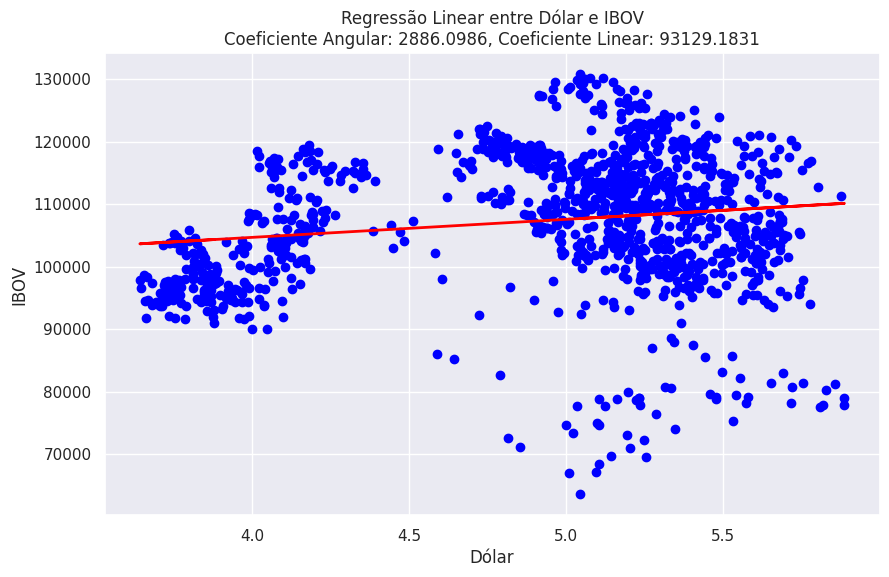

In [11]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Baixar os dados do Yahoo Finance
ativos = "^BVSP USDBRL=X"
carteira = yf.download(ativos, start="2019-01-01")["Close"]
carteira.columns = ["Dolar", "IBOV"]

# Remover dados faltantes (NaN)
carteira = carteira.dropna()

# Divisão do IBOV pelo Dólar
carteira["IBOV_DOLARIZADO"] = carteira["IBOV"] / carteira["Dolar"]

# Estatísticas descritivas
media_dolar = carteira["Dolar"].mean()
desvio_padrao_dolar = carteira["Dolar"].std()
media_ibov = carteira["IBOV"].mean()
desvio_padrao_ibov = carteira["IBOV"].std()
media_ibov_dolarizado = carteira["IBOV_DOLARIZADO"].mean()
desvio_padrao_ibov_dolarizado = carteira["IBOV_DOLARIZADO"].std()

# Regressão Linear
X = carteira["Dolar"].values.reshape(-1, 1)  # Dólar como variável independente (X)
y = carteira["IBOV"].values  # IBOV como variável dependente (y)

X = sm.add_constant(X)  # Adicionar uma constante para o termo linear

model = sm.OLS(y, X).fit()

# Estatísticas de regressão
coeficientes = model.params
matriz_correlacao = carteira.corr()
correlacao_partes = carteira.corr(method='pearson')
correlacoes_parciais = model.pvalues  # Valores-p dos coeficientes

# Outras estatísticas
r_squared = model.rsquared
r_squared_adj = model.rsquared_adj
change_r_squared = r_squared - r_squared_adj
std_error = model.mse_resid

# Exibindo estatísticas
print("Estatísticas Descritivas:")
print(f"Média Dólar: {media_dolar:.4f}, Desvio Padrão Dólar: {desvio_padrao_dolar:.4f}")
print(f"Média IBOV: {media_ibov:.4f}, Desvio Padrão IBOV: {desvio_padrao_ibov:.4f}")
print(f"Média IBOV_DOLARIZADO: {media_ibov_dolarizado:.4f}, Desvio Padrão IBOV_DOLARIZADO: {desvio_padrao_ibov_dolarizado:.4f}")

print("\nCoeficientes de Regressão:")
print(coeficientes)

print("\nMatriz de Correlação:")
print(matriz_correlacao)

print("\nCorrelações de Partes:")
print(correlacao_partes)

print("\nCorrelações Parciais (Valores-P dos Coeficientes):")
print(correlacoes_parciais)

print("\nAvaliação do Modelo:")
if r_squared > 0.8:
    print("R² é alto, o modelo pode ser bom.")
else:
    print("R² é moderado, verifique se é suficiente para seus objetivos.")

if r_squared_adj > 0.8:
    print("R² Ajustado é alto, sugerindo um bom ajuste.")
else:
    print("R² Ajustado é moderado, considere a parcimônia do modelo.")

# Avaliação da significância dos coeficientes
definancia = 0.05  # Nível de significância
coef_significativos = [i for i, p in enumerate(correlacoes_parciais) if p < definancia]
if coef_significativos:
    print(f"Os coeficientes {coef_significativos} são estatisticamente significativos.")
else:
    print("Nenhum coeficiente é estatisticamente significativo.")

if std_error < 0.1:
    print("Erro Padrão baixo sugere um bom ajuste.")
else:
    print("Erro Padrão é moderado, verifique a variação não explicada pelo modelo.")

# Avaliação dos resíduos
# Inclua aqui as verificações relacionadas aos resíduos

# Outras considerações de acordo com o contexto

# Análise de Variância
print("\nAnálise de Variância:")
print(model.summary())

# Valores Previstos
print("\nValores Previstos:")
print(valores_previstos)

# Resíduos
print("\nResíduos:")
print(residuos)

# Plot da reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color='blue')
plt.plot(X[:, 1], model.predict(X), color='red', linewidth=2)
plt.title(f'Regressão Linear entre Dólar e IBOV\nCoeficiente Angular: {coeficientes[1]:.4f}, Coeficiente Linear: {coeficientes[0]:.4f}')
plt.xlabel('Dólar')
plt.ylabel('IBOV')
plt.show()


[*********************100%%**********************]  2 of 2 completed
Estatísticas Descritivas:
Média Dólar: 4.9297, Desvio Padrão Dólar: 0.5891
Média IBOV: 107356.7855, Desvio Padrão IBOV: 10909.1741

Coeficientes de Regressão:
[93129.18309761  2886.09863546]

Matriz de Correlação:
          Dolar      IBOV
Dolar  1.000000  0.155844
IBOV   0.155844  1.000000

Correlações de Partes:
          Dolar      IBOV
Dolar  1.000000  0.155844
IBOV   0.155844  1.000000

Correlações Parciais (Valores-P dos Coeficientes):
[1.96635131e-187 6.62071458e-008]

Avaliação do Modelo:
R² é moderado, verifique se é suficiente para seus objetivos.
R² Ajustado é moderado, considere a parcimônia do modelo.
Os coeficientes [0, 1] são estatisticamente significativos.
Erro Padrão é moderado, verifique a variação não explicada pelo modelo.

Análise de Variância:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.

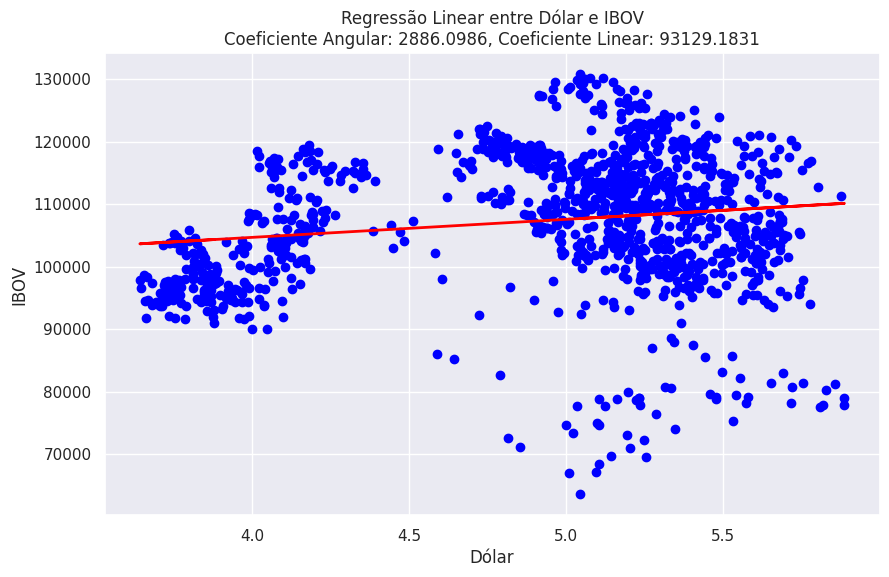

In [12]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Baixar os dados do Yahoo Finance
ativos = "^BVSP USDBRL=X"
carteira = yf.download(ativos, start="2019-01-01")["Close"]
carteira.columns = ["Dolar", "IBOV"]

# Remover dados faltantes (NaN)
carteira = carteira.dropna()

# Estatísticas descritivas
media_dolar = carteira["Dolar"].mean()
desvio_padrao_dolar = carteira["Dolar"].std()
media_ibov = carteira["IBOV"].mean()
desvio_padrao_ibov = carteira["IBOV"].std()

# Regressão Linear
X = carteira["Dolar"].values.reshape(-1, 1)  # Dólar como variável independente (X)
y = carteira["IBOV"].values  # IBOV como variável dependente (y)

X = sm.add_constant(X)  # Adicionar uma constante para o termo linear

model = sm.OLS(y, X).fit()

# Estatísticas de regressão
coeficientes = model.params
matriz_correlacao = carteira.corr()
correlacao_partes = carteira.corr(method='pearson')
correlacoes_parciais = model.pvalues  # Valores-p dos coeficientes

# Outras estatísticas
r_squared = model.rsquared
r_squared_adj = model.rsquared_adj
change_r_squared = r_squared - r_squared_adj
std_error = model.mse_resid

# Exibindo estatísticas
print("Estatísticas Descritivas:")
print(f"Média Dólar: {media_dolar:.4f}, Desvio Padrão Dólar: {desvio_padrao_dolar:.4f}")
print(f"Média IBOV: {media_ibov:.4f}, Desvio Padrão IBOV: {desvio_padrao_ibov:.4f}")

print("\nCoeficientes de Regressão:")
print(coeficientes)

print("\nMatriz de Correlação:")
print(matriz_correlacao)

print("\nCorrelações de Partes:")
print(correlacao_partes)

print("\nCorrelações Parciais (Valores-P dos Coeficientes):")
print(correlacoes_parciais)

print("\nAvaliação do Modelo:")
if r_squared > 0.8:
    print("R² é alto, o modelo pode ser bom.")
else:
    print("R² é moderado, verifique se é suficiente para seus objetivos.")

if r_squared_adj > 0.8:
    print("R² Ajustado é alto, sugerindo um bom ajuste.")
else:
    print("R² Ajustado é moderado, considere a parcimônia do modelo.")

# Avaliação da significância dos coeficientes
definancia = 0.05  # Nível de significância
coef_significativos = [i for i, p in enumerate(correlacoes_parciais) if p < definancia]
if coef_significativos:
    print(f"Os coeficientes {coef_significativos} são estatisticamente significativos.")
else:
    print("Nenhum coeficiente é estatisticamente significativo.")

if std_error < 0.1:
    print("Erro Padrão baixo sugere um bom ajuste.")
else:
    print("Erro Padrão é moderado, verifique a variação não explicada pelo modelo.")

# Avaliação dos resíduos
# Inclua aqui as verificações relacionadas aos resíduos

# Outras considerações de acordo com o contexto

# Análise de Variância
print("\nAnálise de Variância:")
print(model.summary())

# Plot da reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color='blue')
plt.plot(X[:, 1], model.predict(X), color='red', linewidth=2)
plt.title(f'Regressão Linear entre Dólar e IBOV\nCoeficiente Angular: {coeficientes[1]:.4f}, Coeficiente Linear: {coeficientes[0]:.4f}')
plt.xlabel('Dólar')
plt.ylabel('IBOV')
plt.show()


[*********************100%%**********************]  2 of 2 completed
Estatísticas Descritivas:
Média Dólar: 4.6634, Desvio Padrão Dólar: 0.7737
Média IBOV: 101551.3161, Desvio Padrão IBOV: 14387.8394
Média IBOV_DOLARIZADO: 22119.9497, Desvio Padrão IBOV_DOLARIZADO: 3281.9810

Coeficientes de Regressão:
[55738.50676706  9823.93842374]

Matriz de Correlação:
                    Dolar      IBOV  IBOV_DOLARIZADO
Dolar            1.000000  0.528285        -0.631602
IBOV             0.528285  1.000000         0.314592
IBOV_DOLARIZADO -0.631602  0.314592         1.000000

Correlações de Partes:
                    Dolar      IBOV  IBOV_DOLARIZADO
Dolar            1.000000  0.528285        -0.631602
IBOV             0.528285  1.000000         0.314592
IBOV_DOLARIZADO -0.631602  0.314592         1.000000

Correlações Parciais (Valores-P dos Coeficientes):
[5.2319254e-121 7.5112742e-090]

Avaliação do Modelo:
R² é moderado, verifique se é suficiente para seus objetivos.
R² Ajustado é moderado, c

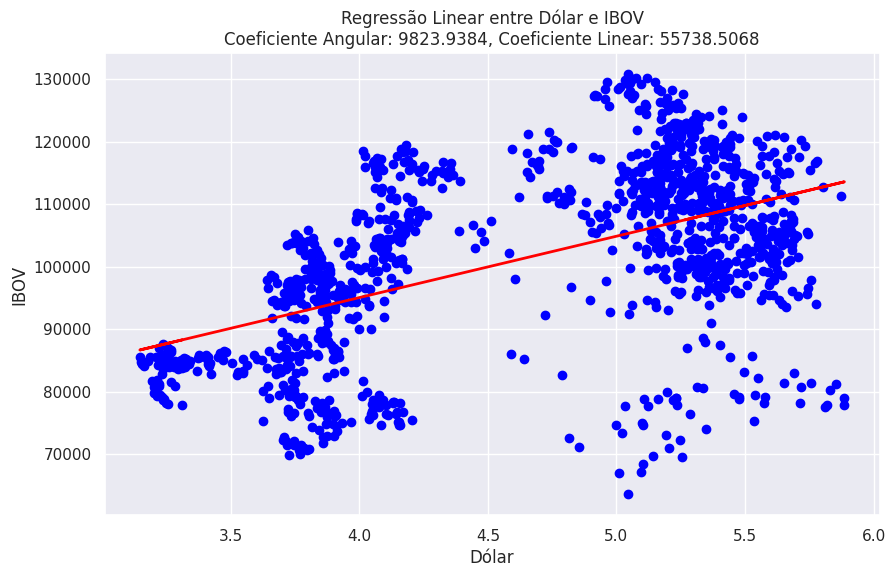

In [14]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Baixar os dados do Yahoo Finance
ativos = "^BVSP USDBRL=X"
carteira = yf.download(ativos, start="2018-01-01", end="2022-12-31")["Close"]
carteira.columns = ["Dolar", "IBOV"]

# Remover dados faltantes (NaN)
carteira = carteira.dropna()

# Divisão do IBOV pelo Dólar
carteira["IBOV_DOLARIZADO"] = carteira["IBOV"] / carteira["Dolar"]

# Estatísticas descritivas
media_dolar = carteira["Dolar"].mean()
desvio_padrao_dolar = carteira["Dolar"].std()
media_ibov = carteira["IBOV"].mean()
desvio_padrao_ibov = carteira["IBOV"].std()
media_ibov_dolarizado = carteira["IBOV_DOLARIZADO"].mean()
desvio_padrao_ibov_dolarizado = carteira["IBOV_DOLARIZADO"].std()

# Regressão Linear
X = carteira["Dolar"].values.reshape(-1, 1)  # Dólar como variável independente (X)
y = carteira["IBOV"].values  # IBOV como variável dependente (y)

X = sm.add_constant(X)  # Adicionar uma constante para o termo linear

model = sm.OLS(y, X).fit()

# Estatísticas de regressão
coeficientes = model.params
matriz_correlacao = carteira.corr()
correlacao_partes = carteira.corr(method='pearson')
correlacoes_parciais = model.pvalues  # Valores-p dos coeficientes

# Outras estatísticas
r_squared = model.rsquared
r_squared_adj = model.rsquared_adj
change_r_squared = r_squared - r_squared_adj
std_error = model.mse_resid

# Exibindo estatísticas
print("Estatísticas Descritivas:")
print(f"Média Dólar: {media_dolar:.4f}, Desvio Padrão Dólar: {desvio_padrao_dolar:.4f}")
print(f"Média IBOV: {media_ibov:.4f}, Desvio Padrão IBOV: {desvio_padrao_ibov:.4f}")
print(f"Média IBOV_DOLARIZADO: {media_ibov_dolarizado:.4f}, Desvio Padrão IBOV_DOLARIZADO: {desvio_padrao_ibov_dolarizado:.4f}")

print("\nCoeficientes de Regressão:")
print(coeficientes)

print("\nMatriz de Correlação:")
print(matriz_correlacao)

print("\nCorrelações de Partes:")
print(correlacao_partes)

print("\nCorrelações Parciais (Valores-P dos Coeficientes):")
print(correlacoes_parciais)

print("\nAvaliação do Modelo:")
if r_squared > 0.8:
    print("R² é alto, o modelo pode ser bom.")
else:
    print("R² é moderado, verifique se é suficiente para seus objetivos.")

if r_squared_adj > 0.8:
    print("R² Ajustado é alto, sugerindo um bom ajuste.")
else:
    print("R² Ajustado é moderado, considere a parcimônia do modelo.")

# Avaliação da significância dos coeficientes
definancia = 0.05  # Nível de significância
coef_significativos = [i for i, p in enumerate(correlacoes_parciais) if p < definancia]
if coef_significativos:
    print(f"Os coeficientes {coef_significativos} são estatisticamente significativos.")
else:
    print("Nenhum coeficiente é estatisticamente significativo.")

if std_error < 0.1:
    print("Erro Padrão baixo sugere um bom ajuste.")
else:
    print("Erro Padrão é moderado, verifique a variação não explicada pelo modelo.")

# Avaliação dos resíduos
# Inclua aqui as verificações relacionadas aos resíduos

# Outras considerações de acordo com o contexto

# Análise de Variância
print("\nAnálise de Variância:")
print(model.summary())

# Valores Previstos
print("\nValores Previstos:")
print(model.fittedvalues)

# Resíduos
print("\nResíduos:")
print(model.resid)

# Plot da reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color='blue')
plt.plot(X[:, 1], model.predict(X), color='red', linewidth=2)
plt.title(f'Regressão Linear entre Dólar e IBOV\nCoeficiente Angular: {coeficientes[1]:.4f}, Coeficiente Linear: {coeficientes[0]:.4f}')
plt.xlabel('Dólar')
plt.ylabel('IBOV')
plt.show()
